In [1]:
import numpy as np
import torch

import models.model as model_file
from run_args import RunArgs
from utils.myUtils import (
    calc_psnrs,
    clear_memory,
    save_psnrs_results,
    visualize_reconstructions,
)
from utils.utils import create_data_loaders

/home/priel.hazan/miniconda3/envs/deepP/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Replace this with the path to your checkpoint
# checkpoint_path = "./cp_epoch_2.pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
done_dir = "/mnt/cslash2/priel/deepProject/results/DoneDirV2/"
# * without and then with

# # dr 0.1:
# cp_path = done_dir + "exp202_drop0.1_mask_lrNA_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"
# cp_path = (
#     done_dir
#     + "exp201_drop0.1_mask_lr0.1_model_UNet_2Plus/exp199_drop0.1_mask_lr0.1_model_UNet_2Plus/epoch_2/cp_epoch_2.pt"  # cause resumed
# )

# # dr 0.2:
# cp_path = done_dir + "exp196_drop0.2_mask_lrNA_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"
# cp_path = done_dir + "exp195_drop0.2_mask_lr0.1_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"

# # dr 0.3:
# cp_path = done_dir + "exp114_drop0.3_mask_lrNA_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"
# cp_path = done_dir + "exp194_drop0.3_mask_lr0.1_model_UNet_2Plus/epoch_2/cp_epoch_2.pt"
# # dr 0.4:
# cp_path = done_dir + "exp193_drop0.4_mask_lrNA_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"
# cp_path = done_dir + "exp192_drop0.4_mask_lr0.1_model_UNet_2Plus/epoch_2/cp_epoch_2.pt"

# # dr 0.5:
# cp_path = done_dir + "exp191_drop0.5_mask_lrNA_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"
# cp_path = done_dir + "exp191_drop0.5_mask_lr0.1_model_UNet_2Plus/epoch_2/cp_epoch_2.pt"

# # dr 0.6:
# cp_path = done_dir + "exp188_drop0.6_mask_lrNA_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"
# cp_path = done_dir + "exp188_drop0.6_mask_lr0.1_model_UNet_2Plus/epoch_2/cp_epoch_2.pt"

# dr 0.7:
cp_path = done_dir + "exp186_drop0.7_mask_lrNA_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"
cp_path = done_dir + "exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/epoch_3/cp_epoch_3.pt"

# load pt and print the keys there:
loaded = torch.load(cp_path, map_location=device)
print(loaded.keys())
# get the value of args key:
args = loaded["args"]
print(args)

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'val_mean_loss', 'curr_lr', 'args'])
Results root: /mnt/cslash2/priel/deepProject/results/
Seed: 0
Data path: /mnt/cslash2/priel/fastmri_knee/
Device: cuda
Batch size: 16
Num workers: 1
Num epochs: 20
Report interval: 80
Drop rate: 0.7
Learn mask: True
Lr: 0.0001
Mask lr: 0.1
Val test split: 0.3
Early stopping: 1
Scale: 0.3
Scale mask lr: 0.2
Start from cp: None


In [3]:
# encoder_decoder = model_file.UNET(in_channels=1, out_channels=1)
encoder_decoder = model_file.UNet_2Plus(in_channels=1, n_classes=1)
model = model_file.ReconstructionModel(
    args.drop_rate, device, args.learn_mask, encoder_decoder
).to(device)
model.load_state_dict(loaded["model_state_dict"])

<All keys matched successfully>

In [4]:
# Create dataloaders
import os

from matplotlib import pyplot as plt

# Load current machine data path
default_args = RunArgs()
args.data_path = default_args.data_path

_, _, test_loader = create_data_loaders(args)

save_images = False
save_plots = True

saving 0 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img0.png


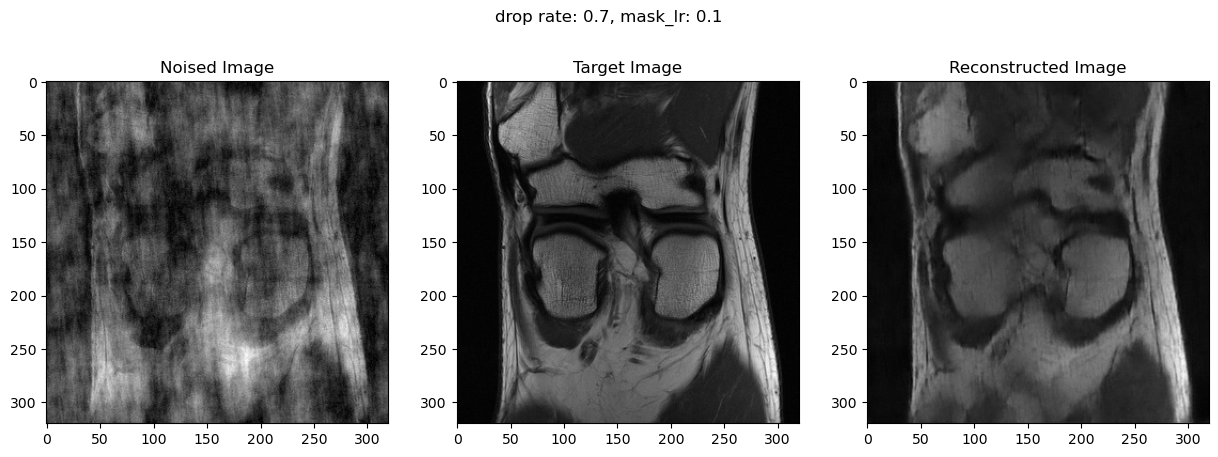

saving 1 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img1.png


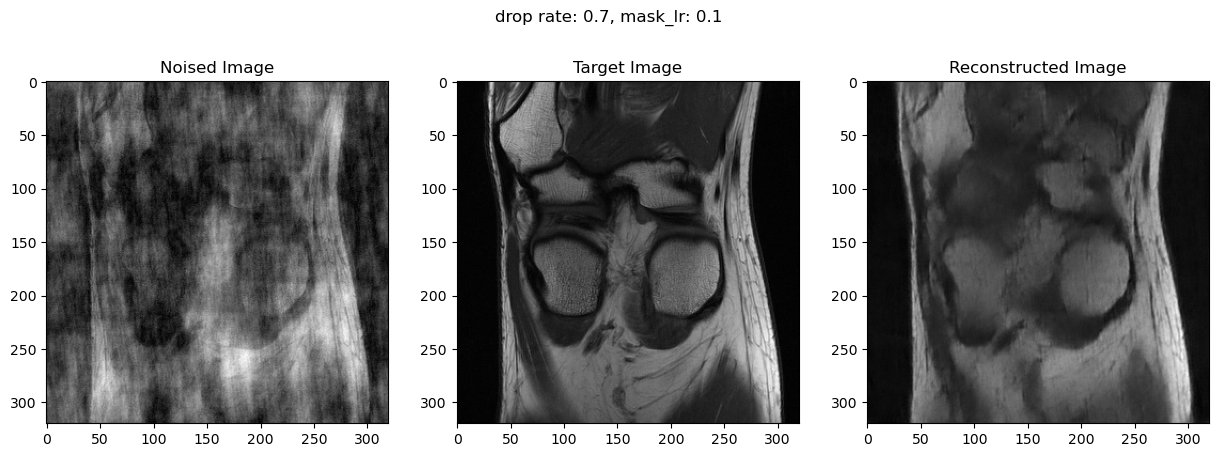

saving 2 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img2.png


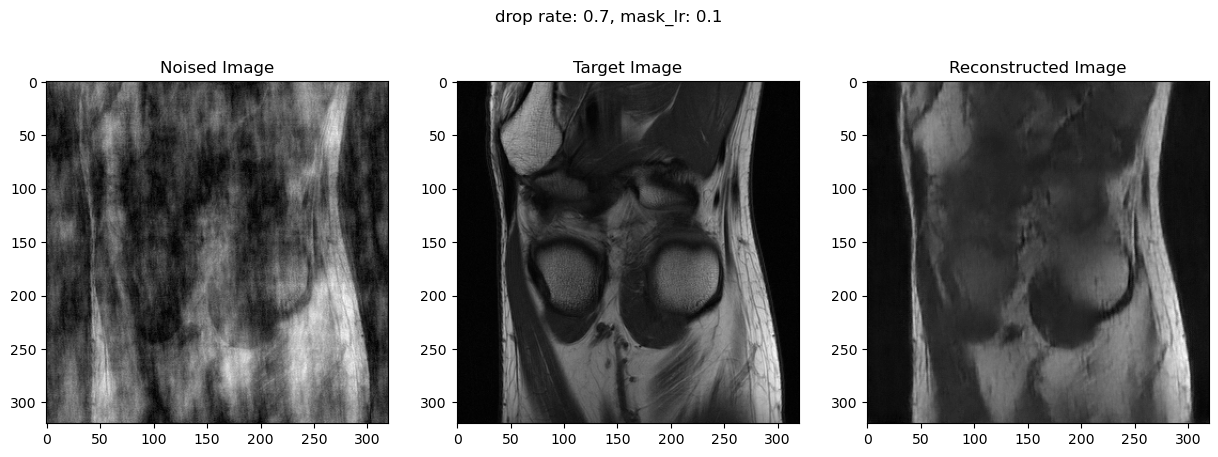

saving 3 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img3.png


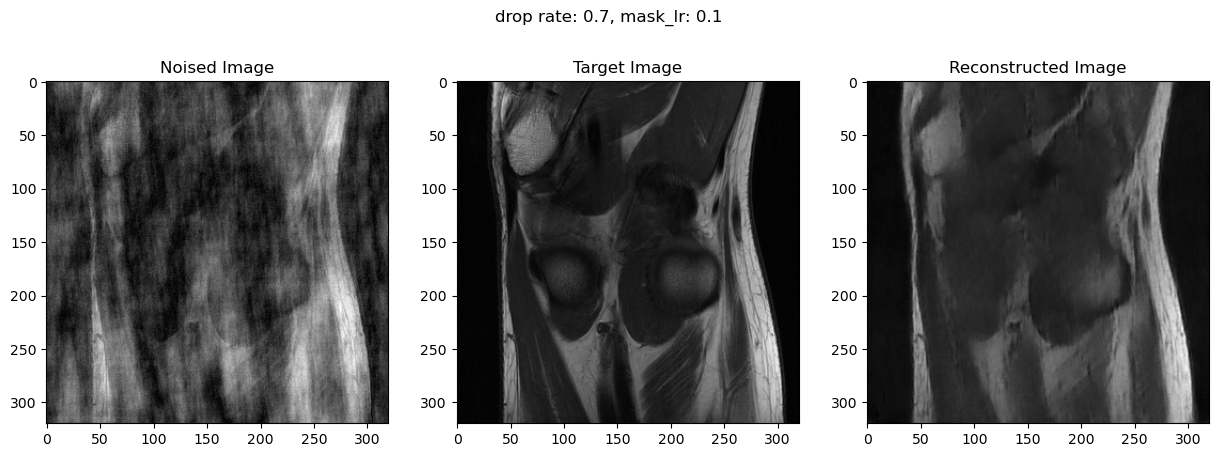

saving 4 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img4.png


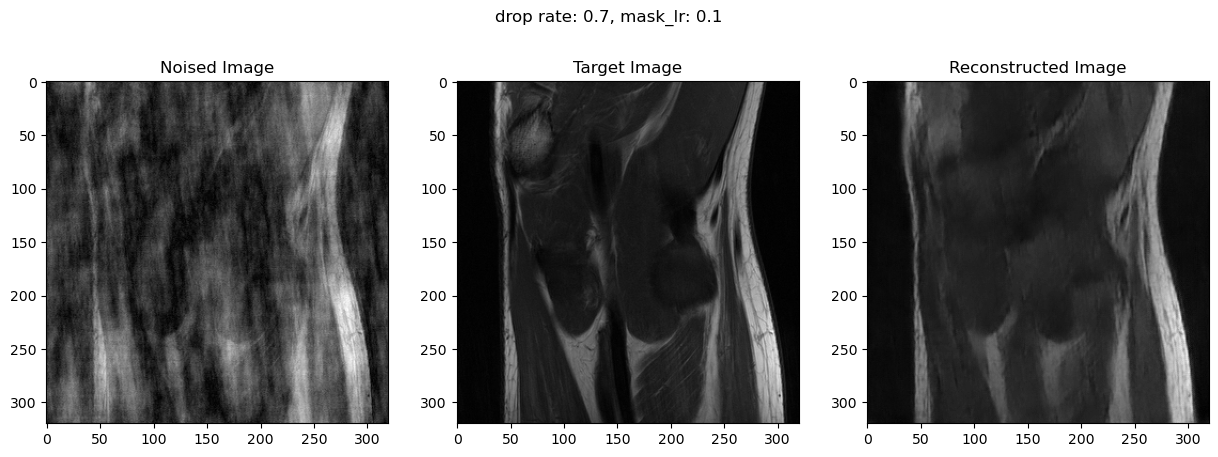

saving 5 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img5.png


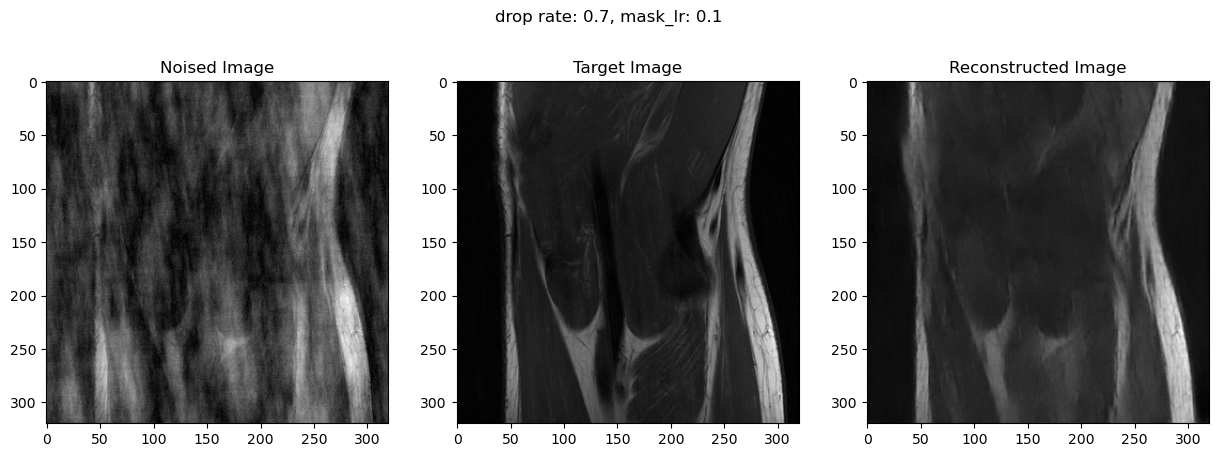

saving 6 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img6.png


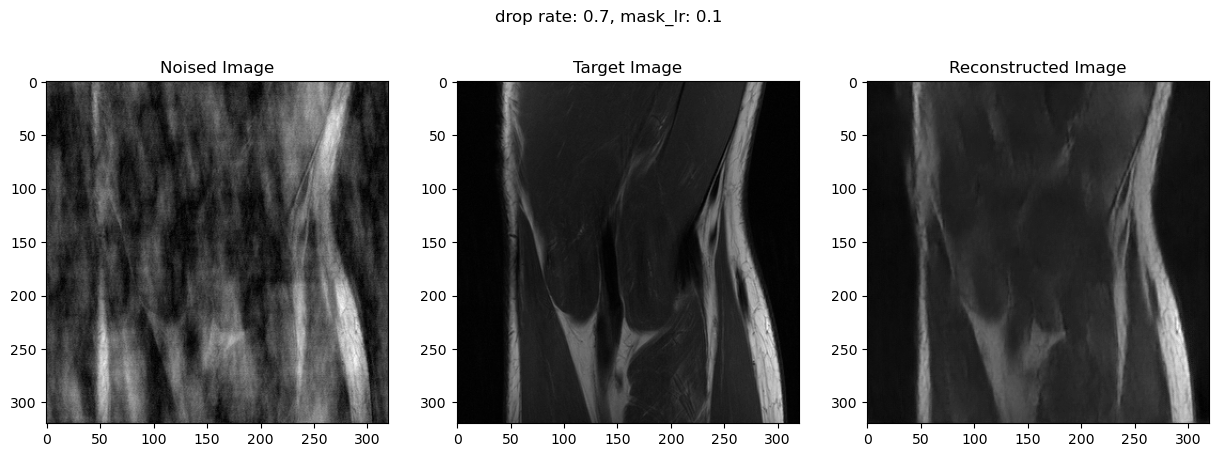

saving 7 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img7.png


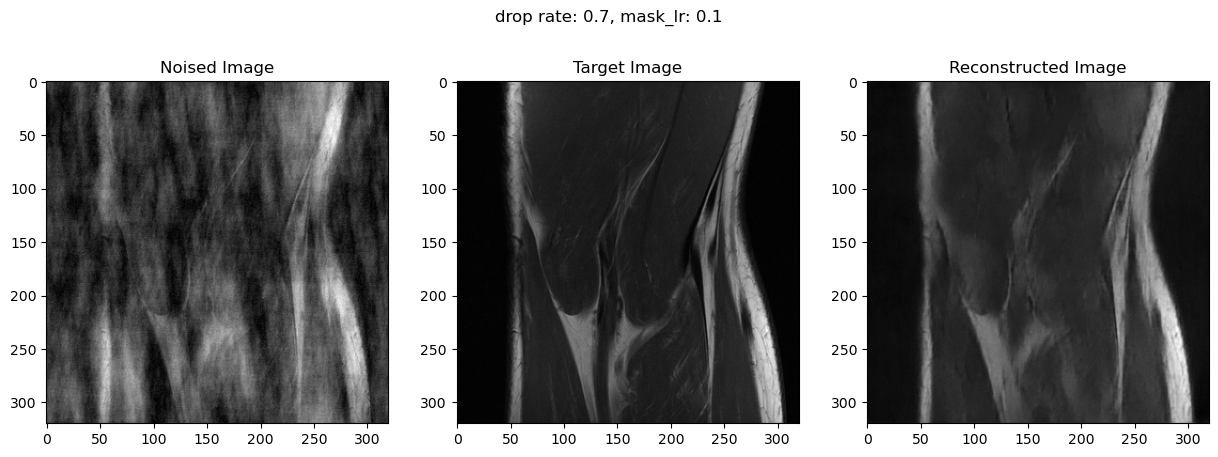

saving 8 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img8.png


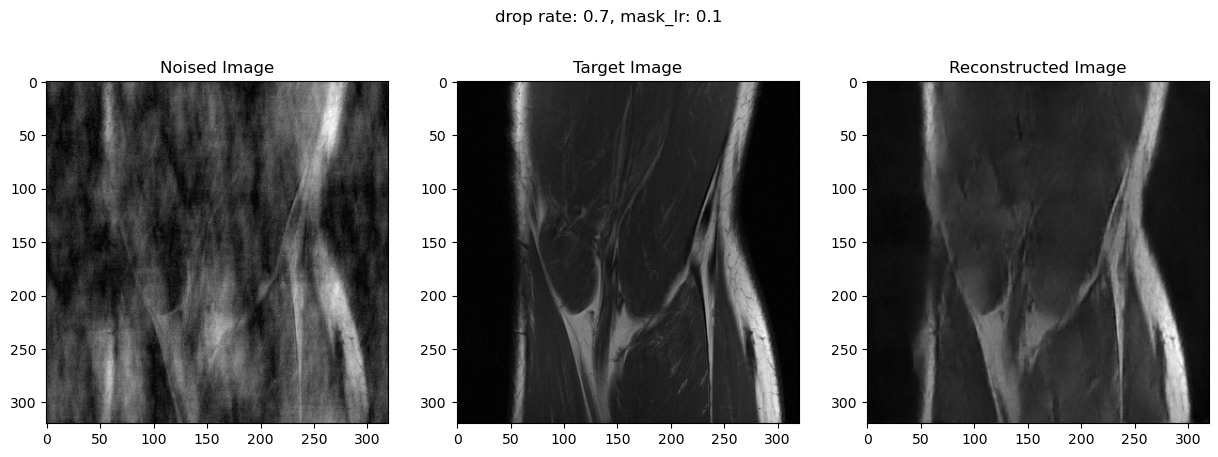

saving 9 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img9.png


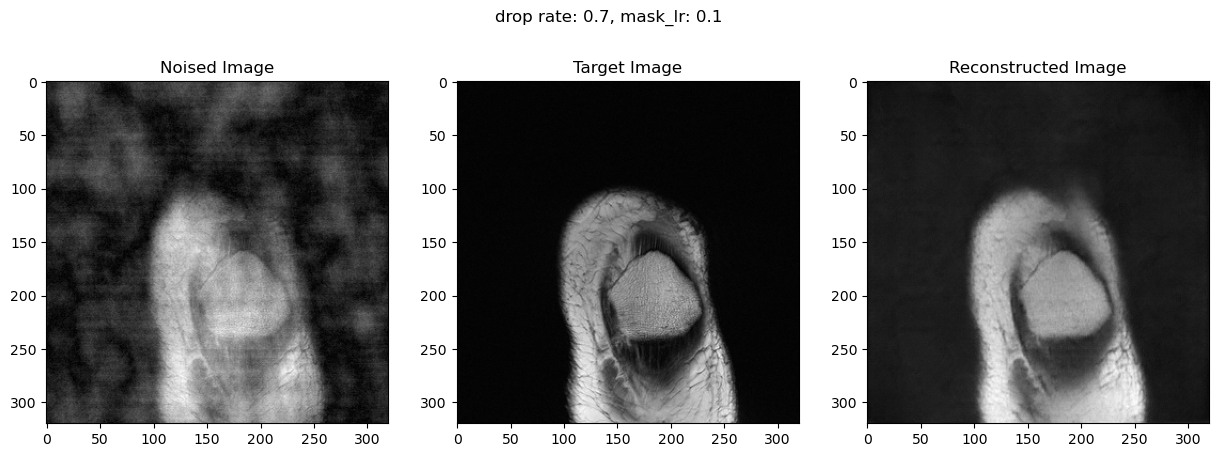

saving 10 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img10.png


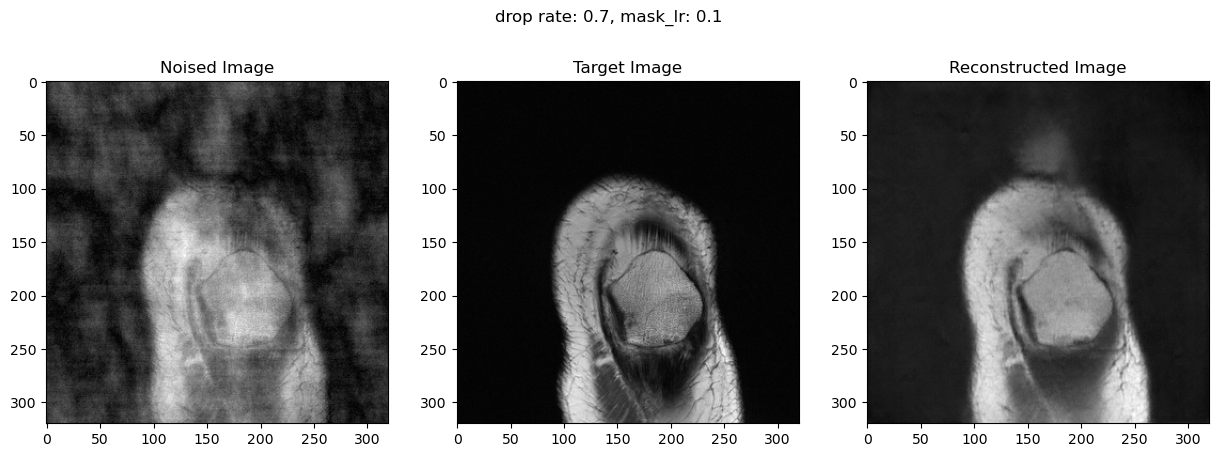

saving 11 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img11.png


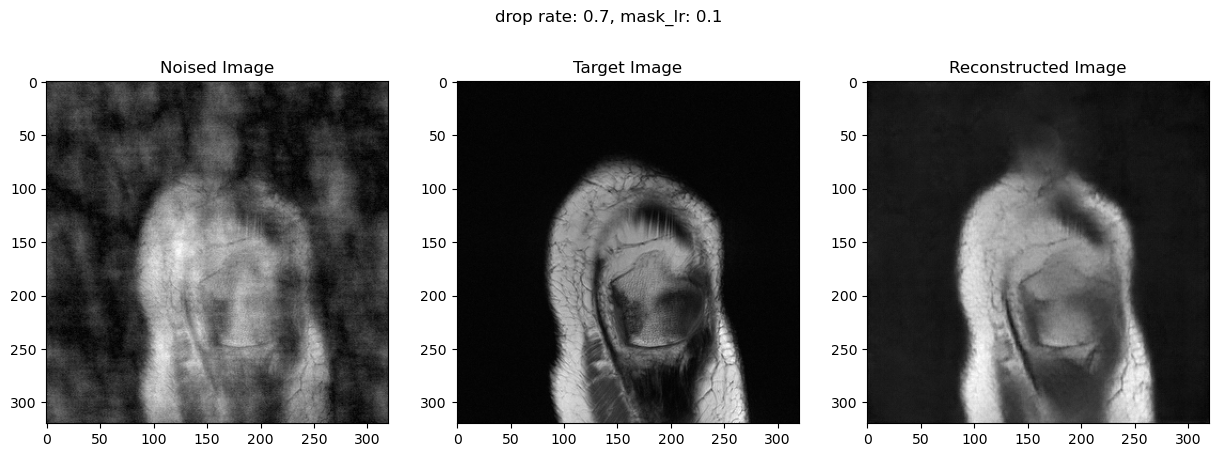

saving 12 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img12.png


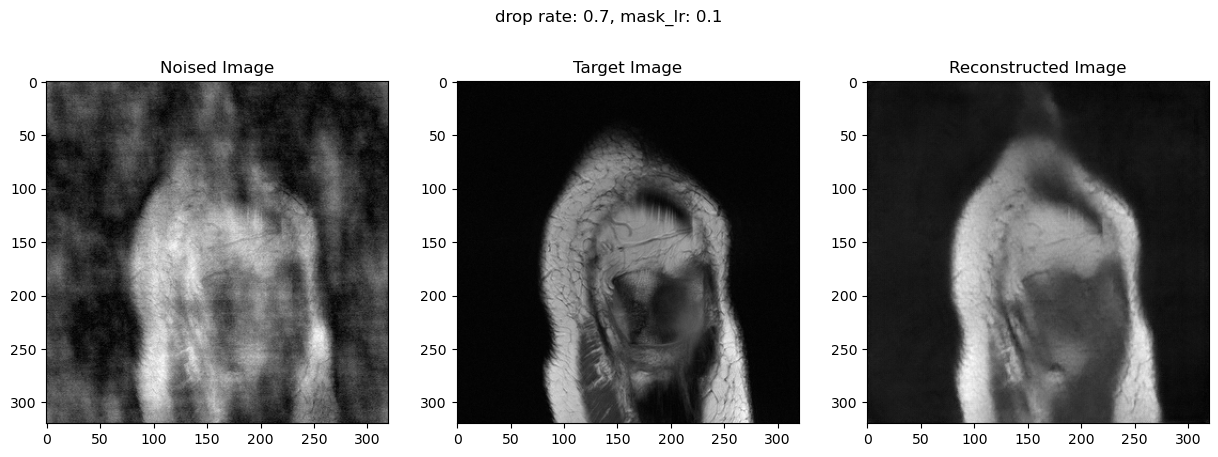

saving 13 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img13.png


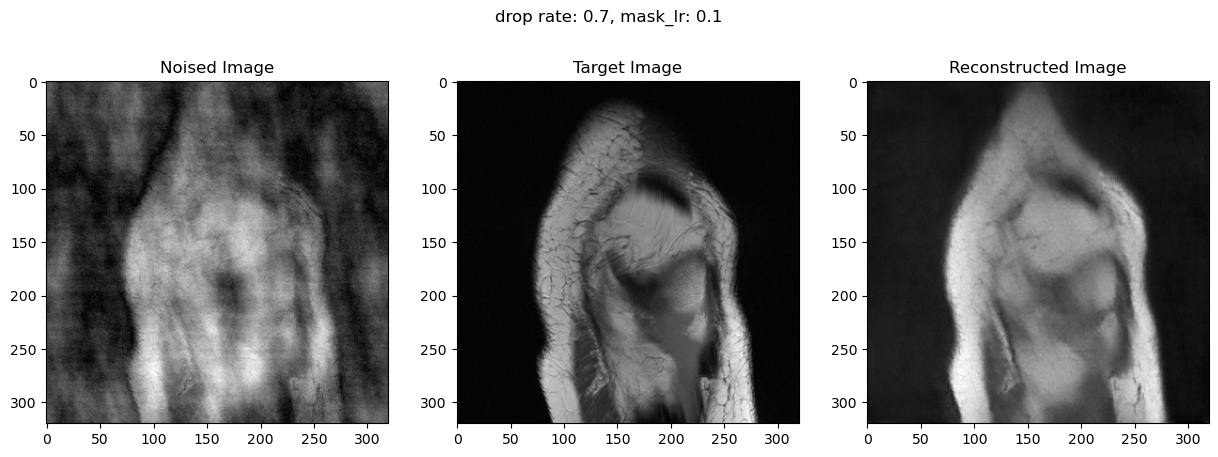

saving 14 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img14.png


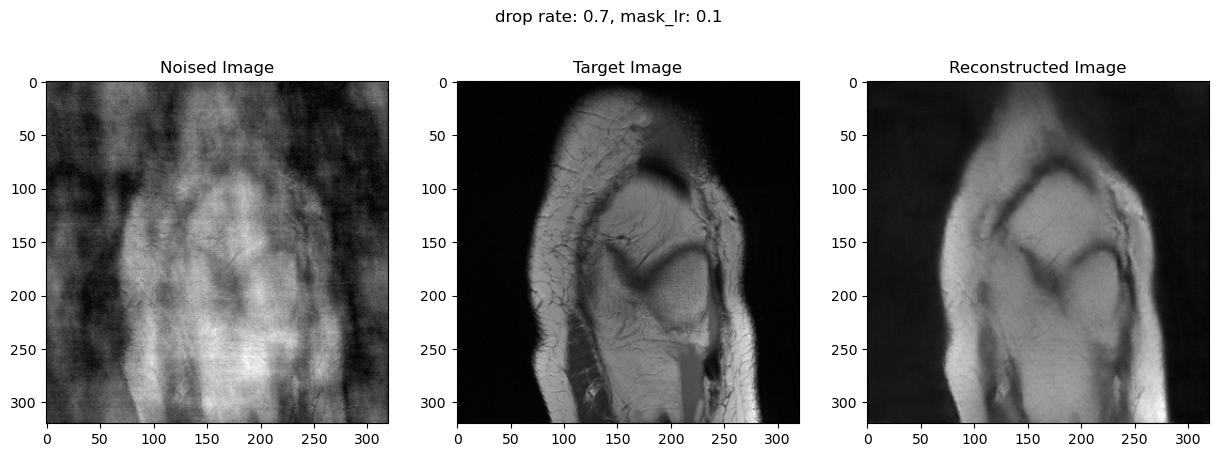

saving 15 image in batch in: /mnt/cslash2/priel/deepProject/results/DoneDirV2/exp187_drop0.7_mask_lr0.1_model_UNet_2Plus/test_set_vizualizations/dr-0.7__maskLR-0.1__img15.png


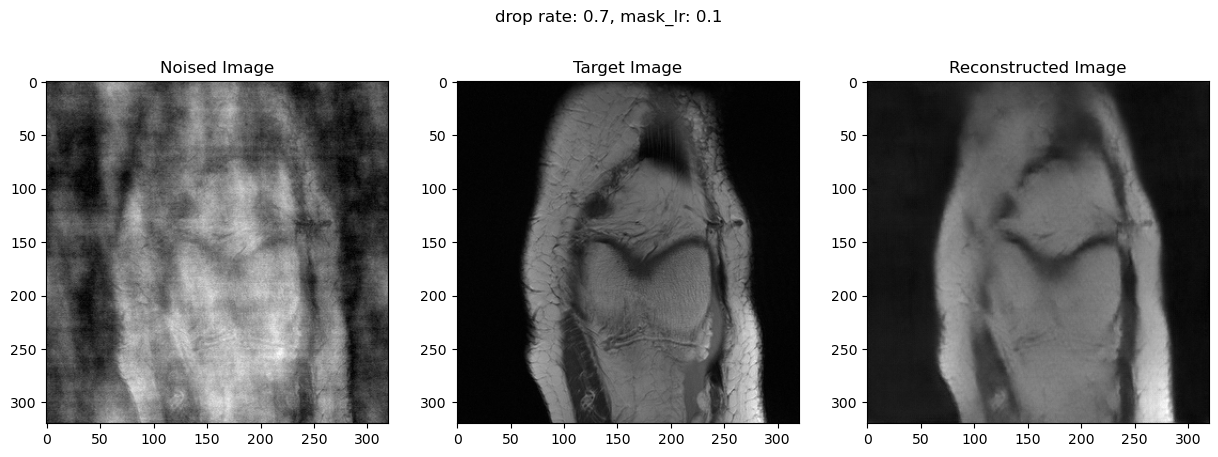

In [5]:
# Visualization and PSNR calculation
batch_to_visualize = 14
with torch.no_grad():
    model.eval()
    # get the batch
    for i, batch in enumerate(test_loader):
        if i == batch_to_visualize:
            break
    freq_images, target_images = batch
    freq_images = freq_images.to(args.device)
    target_images = target_images.to(args.device)
    reconstructed_images, noised_images = model(freq_images, return_noised=True)
    reconstructed_images = (
        reconstructed_images.squeeze()
    )  # remove all dimensions of size 1
    # save in ./images/drop{args.drop_rate}mask_lr{args.mask_lr} dir, 10 dirs,
    # each with name 0,1..9, and each contains the noised, target and reconstructed images
    # without isualize_reconstructions func!! plot and save!
    for i in range(args.batch_size):
        if save_images:
            # plot and save noised, target and reconstructed images
            plot_dir = f"./images/drop{args.drop_rate}mask_lr{args.mask_lr}/{i}"
            # make the dir if not exists
            os.makedirs(plot_dir, exist_ok=True)
            # save noised image
            plt.imsave(
                f"{plot_dir}/noised.png",
                noised_images[i].squeeze().cpu().numpy(),
                cmap="gray",
            )
            # save target image
            plt.imsave(
                f"{plot_dir}/target.png",
                target_images[i].squeeze().cpu().numpy(),
                cmap="gray",
            )
            # save reconstructed image
            plt.imsave(
                f"{plot_dir}/reconstructed.png",
                reconstructed_images[i].squeeze().cpu().numpy(),
                cmap="gray",
            )
        else:
            # plot noised, target and reconstructed images
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(noised_images[i].squeeze().cpu().numpy(), cmap="gray")
            plt.title("Noised Image")

            plt.subplot(1, 3, 2)
            plt.imshow(target_images[i].squeeze().cpu().numpy(), cmap="gray")
            plt.title("Target Image")

            plt.subplot(1, 3, 3)
            plt.imshow(reconstructed_images[i].squeeze().cpu().numpy(), cmap="gray")
            plt.title("Reconstructed Image")
            # a general title to the figure with the drop rate and mask_lr:
            plt.suptitle(f"drop rate: {args.drop_rate}, mask_lr: {args.mask_lr}")
            if save_plots:
                # save in the father of the dir of checkpoint_path
                plot_dir = os.path.dirname(os.path.dirname(cp_path))
                plot_dir = os.path.join(plot_dir, "test_set_vizualizations")
                plot_file_path = (
                    f"{plot_dir}/dr-{args.drop_rate}__maskLR-{args.mask_lr}__img{i}.png"
                )
                print(f"saving {i} image in batch in: {plot_file_path}")
                # assure exist
                os.makedirs(plot_dir, exist_ok=True)
                plt.savefig(
                    plot_file_path,
                    bbox_inches="tight",
                    pad_inches=0,
                )
            plt.show()